In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [23]:
predictions_df = pd.read_csv('../data/df_with_preds2.tsv', sep='\t') #, dtype={'image': np.float32})

ValueError: could not convert string to float: '[[[ 84.59955   83.265625  75.40045 ]\n  [ 84.40448   80.40448   72.734375]\n  [ 87.90065   83.73212   76.40625 ]\n  ...\n  [ 67.        67.        61.      ]\n  [ 67.        67.        61.      ]\n  [ 67.        67.        61.      ]]\n\n [[ 87.670105  83.670105  76.      ]\n  [ 87.79953   84.70961   77.82016 ]\n  [ 89.51393   86.75391   80.95416 ]\n  ...\n  [ 70.85547   67.        60.44922 ]\n  [ 70.85547   67.        60.44922 ]\n  [ 70.40581   69.24831   61.798203]]\n\n [[ 87.32587   84.        76.      ]\n  [ 87.45209   86.75391   79.30469 ]\n  [ 90.        89.        82.      ]\n  ...\n  [ 73.9247    72.43251   66.96724 ]\n  [ 73.08203   71.58984   62.753906]\n  [ 79.010544  73.42357   66.701996]]\n\n ...\n\n [[124.       116.       104.      ]\n  [124.       116.       104.      ]\n  [124.37651  116.30121  104.30121 ]\n  ...\n  [ 29.959625  43.966354  43.966354]\n  [ 30.178131  46.918625  45.12175 ]\n  [ 35.496613  51.        47.      ]]\n\n [[124.       116.       104.      ]\n  [125.23711  116.989685 104.989685]\n  [128.36172  119.819275 109.46875 ]\n  ...\n  [ 30.141281  46.660675  45.0112  ]\n  [ 28.629059  45.62773   43.830856]\n  [ 31.        51.        47.      ]]\n\n [[124.       116.       104.      ]\n  [126.75391  118.203125 106.203125]\n  [128.08203  120.       111.671875]\n  ...\n  [ 34.250565  54.160202  50.220444]\n  [ 32.697525  52.090805  48.495285]\n  [ 31.        51.        47.      ]]]'

In [5]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7834 non-null   int64  
 1   predict                    7834 non-null   object 
 2   actual                     7834 non-null   object 
 3   image                      7834 non-null   object 
 4   filepaths                  7834 non-null   object 
 5   filename                   7834 non-null   object 
 6   lat_from_file              7834 non-null   float64
 7   long_from_file             7834 non-null   float64
 8   order                      7834 non-null   int64  
 9   latlong_test               7834 non-null   object 
 10  Location                   1641 non-null   object 
 11  Name                       7834 non-null   object 
 12  Category                   7834 non-null   object 
 13  Description                7834 non-null   objec

In [9]:
first_img = predictions_df.loc[0, 'filepaths']

In [13]:
first_img

'/Users/pault/Desktop/github/CampsitePredict/data/symlink_data/unique_wild_est_for_aligned_model/Established Campground/satimg_AK_1028_Established Campground_17_60.958322_-149.111734.png'

In [14]:
img = plt.imread(first_img)

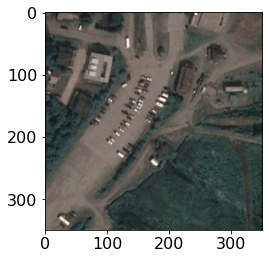

In [17]:
plt.imshow(img)

In [24]:
img_str = predictions_df.iloc[0,3]

In [31]:
img_str

'[[[ 84.59955   83.265625  75.40045 ]\n  [ 84.40448   80.40448   72.734375]\n  [ 87.90065   83.73212   76.40625 ]\n  ...\n  [ 67.        67.        61.      ]\n  [ 67.        67.        61.      ]\n  [ 67.        67.        61.      ]]\n\n [[ 87.670105  83.670105  76.      ]\n  [ 87.79953   84.70961   77.82016 ]\n  [ 89.51393   86.75391   80.95416 ]\n  ...\n  [ 70.85547   67.        60.44922 ]\n  [ 70.85547   67.        60.44922 ]\n  [ 70.40581   69.24831   61.798203]]\n\n [[ 87.32587   84.        76.      ]\n  [ 87.45209   86.75391   79.30469 ]\n  [ 90.        89.        82.      ]\n  ...\n  [ 73.9247    72.43251   66.96724 ]\n  [ 73.08203   71.58984   62.753906]\n  [ 79.010544  73.42357   66.701996]]\n\n ...\n\n [[124.       116.       104.      ]\n  [124.       116.       104.      ]\n  [124.37651  116.30121  104.30121 ]\n  ...\n  [ 29.959625  43.966354  43.966354]\n  [ 30.178131  46.918625  45.12175 ]\n  [ 35.496613  51.        47.      ]]\n\n [[124.       116.       104.      ]\n 

In [32]:
img_array = np.fromstring(img_str)

/usr/local/anaconda3/envs/tf_py377/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


ValueError: string size must be a multiple of element size

In [29]:
type(img_array)

numpy.ndarray

In [30]:
img_array

array([], dtype=float64)